<a href="https://colab.research.google.com/github/Ritukuklani/Deep-Learning/blob/main/autograd_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS-GY 9223 Deep Learning Recitation 1

<i>Referenced from course material of DS-GA 1008, NYU CDS. <br> Instructors: Yann LeCun & Alfredo Canziani <br> https://atcold.github.io/pytorch-Deep-Learning/  </i>

# Autograd: automatic differentiation

The ``autograd`` package provides automatic differentiation for all operations
on Tensors. It is a define-by-run framework, which means that your backprop is
defined by how your code is run, and that every single iteration can be
different.

In [ ]:
import torch

Create a tensor:

In [ ]:
# Create a 2x2 tensor with gradient-accumulation capabilities
x = torch.tensor([[1, 2], [3, 4]], requires_grad=True, dtype=torch.float32)
print(x)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


Do an operation on the tensor:

In [ ]:
# Deduct 2 from all elements
y = x - 2
print(y)

tensor([[-1.,  0.],
        [ 1.,  2.]], grad_fn=<SubBackward0>)


``y`` was created as a result of an operation, so it has a ``grad_fn``.



In [ ]:
print(y.grad_fn) # We have a gradient function for y as it has been generated from x

In [ ]:
# What's happening here?
print(x.grad_fn) # We did not get a gradient_function for x as no backpropogation has been performed for generate x. We have just declared it as a variable above.

None


In [ ]:
# Let's dig further...
y.grad_fn

In [ ]:
y.grad_fn.next_functions[0][0]

In [ ]:
y.grad_fn.next_functions[0][0].variable

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)

In [ ]:
# Do more operations on y
z = y * y * 3
a = z.mean()  # average

print(z)
print(a)

tensor([[ 3.,  0.],
        [ 3., 12.]], grad_fn=<MulBackward0>)
tensor(4.5000, grad_fn=<MeanBackward0>)


In [ ]:
!pip install torchviz

     |████████████████████████████████| 51kB 2.2MB/s 
  Created wheel for torchviz: filename=torchviz-0.0.1-cp36-none-any.whl size=3520 sha256=9d1a3408c4a2e1870cdf795b069cc67a2ea42aeba28bea73c76d491b9c6e5328
  Stored in directory: /root/.cache/pip/wheels/2a/c2/c5/b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz


In [ ]:
# Let's visualise the computational graph! (thks @szagoruyko)
from torchviz import make_dot

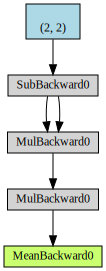

In [ ]:
make_dot(a) # The yellow box indicates the starting point of the graph(a). Gradients are computed backwards. 
            # The blue box is the actual gradient matrix. The gray boxes are the intermediate gradients. 
            # The two arrows indicate y*y and the next mulbackward0 indicates *3.
            # Pytorch doesn't create gradients for nodes that do not contribute in the gradient calculation.

## Gradients

Let's backprop now `out.backward()` is equivalent to doing `out.backward(torch.tensor([1.0]))`

In [ ]:
# Backprop
a.backward()    # da/dx = 1.5*xi-3 (No derivative for summation)

Print gradients $\frac{\text{d}a}{\text{d}x}$.




In [ ]:
# Compute it by hand BEFORE executing this
print(x.grad)

tensor([[-1.5000,  0.0000],
        [ 1.5000,  3.0000]])


You can do many crazy things with autograd!
> With Great *Flexibility* Comes Great Responsibility

In [ ]:
# Dynamic graphs!
x = torch.randn(3, requires_grad=True)
print(x)
y = x * 2
print(y)
i = 0
print(y.data.norm)
while y.data.norm() < 1000:
    y = y * 2
    i += 1
print(y)

tensor([-0.2742,  0.4320, -0.2103], requires_grad=True)
tensor([-0.5484,  0.8641, -0.4206], grad_fn=<MulBackward0>)
<bound method Tensor.norm of tensor([-0.5484,  0.8641, -0.4206])>
tensor([-561.5914,  884.8142, -430.6466], grad_fn=<MulBackward0>)


In [ ]:
# If we don't run backward on a scalar we need to specify the grad_output
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [ ]:
# BEFORE executing this, can you tell what would you expect it to print?
print(i)

9


## Inference

In [ ]:
# This variable decides the tensor's range below
n = 3

In [ ]:
# Both x and w that allows gradient accumulation
x = torch.arange(1., n + 1, requires_grad=True)
w = torch.ones(n, requires_grad=True)
z = w @ x
z.backward()
print(x.grad, w.grad, sep='\n')

In [ ]:
# Only w that allows gradient accumulation
x = torch.arange(1., n + 1)
w = torch.ones(n, requires_grad=True)
z = w @ x
z.backward()
print(x.grad, w.grad, sep='\n')

In [ ]:
x = torch.arange(1., n + 1)
w = torch.ones(n, requires_grad=True)

# Regardless of what you do in this context, all torch tensors will not have gradient accumulation
with torch.no_grad():
    z = w @ x

try:
    z.backward()  # PyTorch will throw an error here, since z has no grad accum.
except RuntimeError as e:
    print('RuntimeError!!! >:[')
    print(e)

## More stuff

Documentation of the automatic differentiation package is at
http://pytorch.org/docs/autograd.